In [6]:
# 1) Imports
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)


In [7]:

########################################
# CONFIGURE CLIENT IDS
########################################
client_ids = [3, 4]  

########################################
# FUNCTION TO LOAD METRICS
########################################
def load_metrics(client_id):
    """
    Load eval metrics from ./fl_tinybert/results/client_{client_id}/metrics.json
    """
    path = f"./fl_tinybert/results/client_{client_id}/metrics.json"
    if not os.path.exists(path):
        print(f"❌ metrics.json not found for Client {client_id} at path: {path}")
        return None
    with open(path, "r") as f:
        data = json.load(f)
    return data



In [8]:
########################################
# 1) Specify the path to your results folder
########################################

# Because your notebook is in /MBFT_LITE_FL/notebooks,
# and your results are in /MBFT_LITE_FL/fl_tinybert/results,
# we go one level up (..) then into fl_tinybert/results
BASE_PATH = "../fl_tinybert/results"

########################################
# 2) Which clients do you want to load?
########################################
client_ids = [3, 4]  # or [1,2,3,4] once all are done


In [9]:
import os
print(os.getcwd())


/Users/tvishakhanna/MBFT_LITE_FL/notebooks


In [10]:
########################################
# 3) Load metrics from metrics.json
########################################
def load_metrics(client_id):
    """Load eval metrics from ../fl_tinybert/results/client_{client_id}/metrics.json."""
    path = f"{BASE_PATH}/client_{client_id}/metrics.json"
    if not os.path.exists(path):
        print(f"❌ metrics.json not found for Client {client_id} at path: {path}")
        return None
    with open(path, "r") as f:
        data = json.load(f)
    return data

metrics_list = []
for cid in client_ids:
    data = load_metrics(cid)
    if data:
        # Typically data has keys like 'eval_accuracy','eval_precision','eval_recall','eval_f1','eval_loss'
        metrics_list.append({
            "client": cid,
            "accuracy": data.get("eval_accuracy", 0),
            "precision": data.get("eval_precision", 0),
            "recall": data.get("eval_recall", 0),
            "f1_score": data.get("eval_f1", 0),
            "loss": data.get("eval_loss", 0)
        })

metrics_df = pd.DataFrame(metrics_list)
print("=== Client Metrics DataFrame ===")
display(metrics_df)

=== Client Metrics DataFrame ===


,client,accuracy,precision,recall,f1_score,loss
0,3,0.989683,0.980132,0.998314,0.989140,0.094569
1,4,0.870640,0.980695,0.751479,0.850921,1.493562


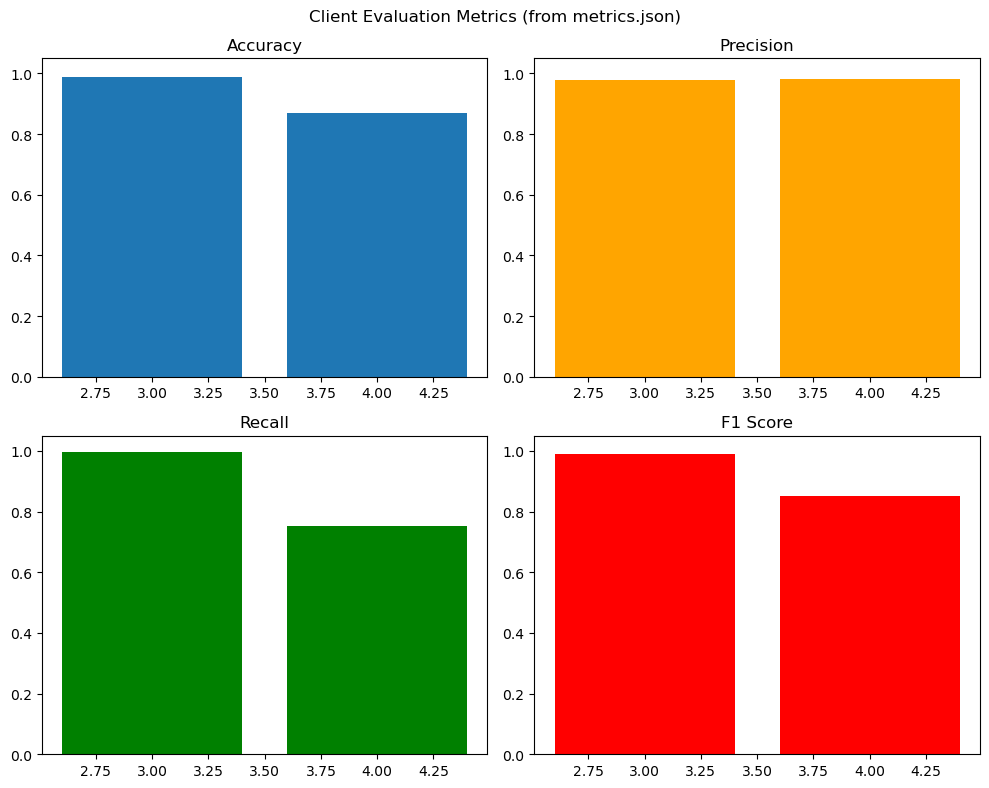

In [16]:
########################################
# 4) Plot Bar Charts for Accuracy / Precision / Recall / F1
########################################
if not metrics_df.empty:
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle("Client Evaluation Metrics (from metrics.json)")

    # Accuracy
    axs[0, 0].bar(metrics_df["client"], metrics_df["accuracy"])
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_ylim(0, 1.05)

    # Precision
    axs[0, 1].bar(metrics_df["client"], metrics_df["precision"], color="orange")
    axs[0, 1].set_title("Precision")
    axs[0, 1].set_ylim(0, 1.05)

    # Recall
    axs[1, 0].bar(metrics_df["client"], metrics_df["recall"], color="green")
    axs[1, 0].set_title("Recall")
    axs[1, 0].set_ylim(0, 1.05)

    # F1 Score
    axs[1, 1].bar(metrics_df["client"], metrics_df["f1_score"], color="red")
    axs[1, 1].set_title("F1 Score")
    axs[1, 1].set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()
else:
    print("No metrics found to plot...")

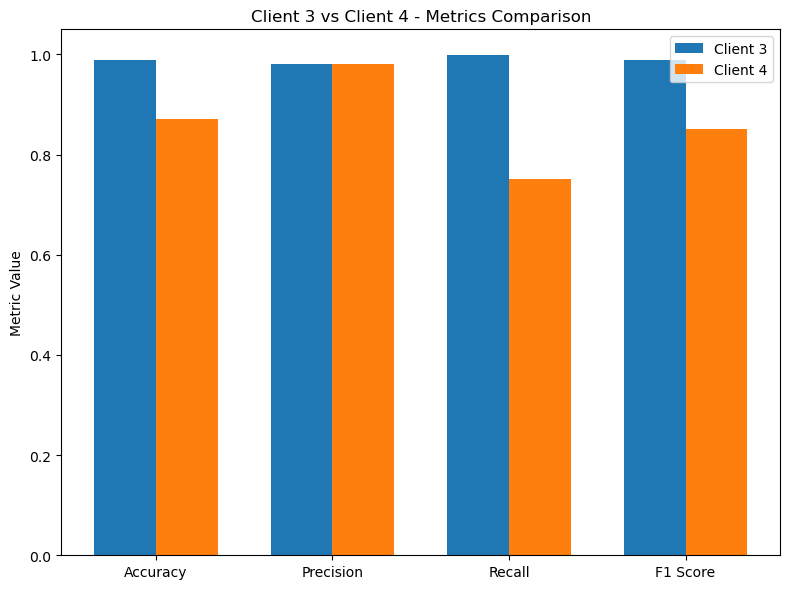

In [20]:
def plot_single_bar_chart(metrics_df):
    # 1) Extract metric columns
    metric_names = ["accuracy","precision","recall","f1_score"]

    # 2) We'll have one group for each metric
    x = np.arange(len(metric_names))  # 4 metrics → x positions = [0,1,2,3]

    # 3) We'll have a bar width, e.g. 0.35
    bar_width = 0.35

    # 4) Separate your two clients’ data
    #    Assume first row is client_1, second row is client_2
    client1 = metrics_df[metrics_df["client"]==3].iloc[0]
    client2 = metrics_df[metrics_df["client"]==4].iloc[0]

    client1_metrics = [client1[m] for m in metric_names]
    client2_metrics = [client2[m] for m in metric_names]

    # 5) Plot
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x, client1_metrics, bar_width, label="Client 3")
    ax.bar(x + bar_width, client2_metrics, bar_width, label="Client 4")

    # 6) Setup ticks and labels
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(["Accuracy","Precision","Recall","F1 Score"])
    ax.set_ylim(0,1.05)
    ax.set_ylabel("Metric Value")
    ax.set_title("Client 3 vs Client 4 - Metrics Comparison")
    ax.legend()

    plt.tight_layout()
    plt.show()

# Usage example:
plot_single_bar_chart(metrics_df)



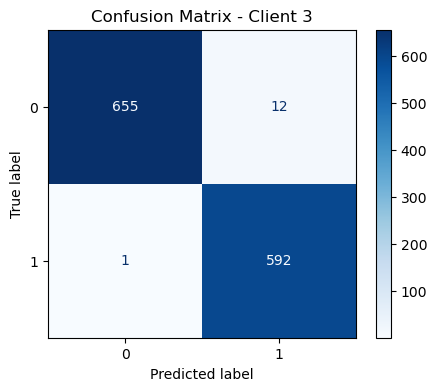

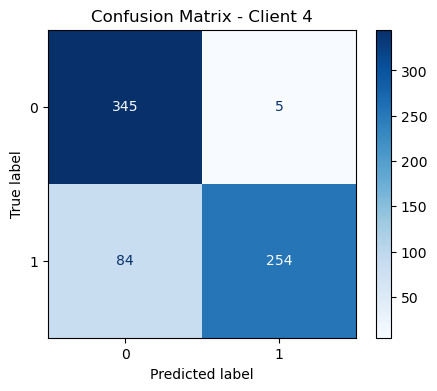

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(csv_path, client_id):
    """
    Expects a CSV with columns [true, pred] at csv_path.
    Plots a confusion matrix labeled with the client ID.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ File not found at: {csv_path}")
        return

    if "true" not in df.columns or "pred" not in df.columns:
        print(f"❌ 'true'/'pred' columns missing in predictions at {csv_path}.")
        return

    cm = confusion_matrix(df["true"], df["pred"])
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Client {client_id}")
    plt.show()

# Usage: (corrected paths)
plot_confusion_matrix("../fl_tinybert/results/client_3/predictions.csv", client_id=3)
plot_confusion_matrix("../fl_tinybert/results/client_4/predictions.csv", client_id=4)


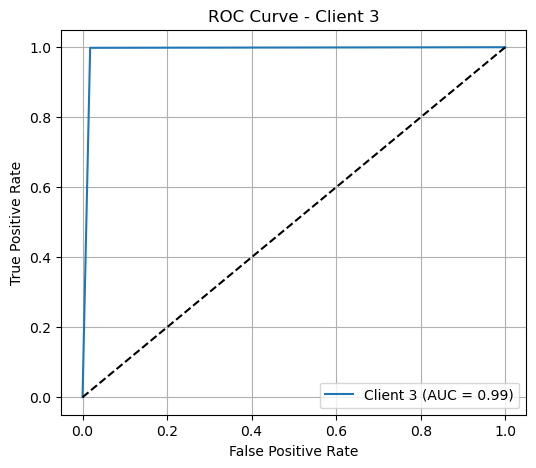

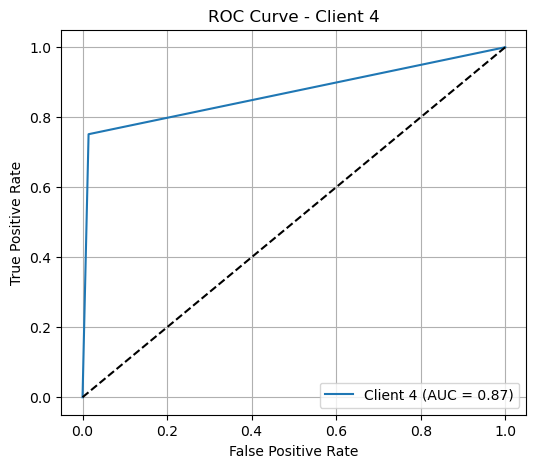

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(csv_path, client_id):
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"❌ File not found at: {csv_path}")
        return

    if "true" not in df.columns or "pred" not in df.columns:
        print(f"❌ 'true'/'pred' columns missing in predictions at {csv_path}.")
        return

    # Check binary classification
    y_true = df["true"].values
    y_pred = df["pred"].values

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"Client {client_id} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.title(f"ROC Curve - Client {client_id}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Usage:
plot_roc_curve("../fl_tinybert/results/client_3/predictions.csv", client_id=3)
plot_roc_curve("../fl_tinybert/results/client_4/predictions.csv", client_id=4)
